In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from os import listdir
from PIL import Image

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , InputLayer , Conv2D , UpSampling2D , MaxPooling2D , BatchNormalization  , Flatten
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed  , ConvLSTM2D , Layer , Input
from tensorflow.keras.layers import LeakyReLU , RepeatVector , Reshape
from tensorflow.keras.models import load_model
from sklearn.preprocessing   import StandardScaler , MinMaxScaler
from tensorflow.keras        import losses

In [ ]:
vedio_path = '/content/vedio.mp4'
cap=cv2.VideoCapture(vedio_path)

In [ ]:
frame_count=0
while True :
  ret , frame =cap.read()
  if not ret :
    break
  if frame_count<=750 :
    cv2.imwrite(f'/content/image/test/Normal/frame{frame_count}.jpg' , frame)
  elif frame_count>750:
    cv2.imwrite(f'/content/image/test1/Anormal/frame{frame_count}.jpg' , frame)
  #elif frame_count>400 and frame_count<=600 :
   # cv2.imwrite(f'/content/image/val/Normal/frame{frame_count}.jpg' , frame)
  #else :
   # pass
  frame_count+=1

In [ ]:
train_data_gene = ImageDataGenerator(rescale=1./255)
test_data_gene  = ImageDataGenerator(rescale=1./255)
val_data_gene   = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gene=train_data_gene.flow_from_directory(
    '/content/image/test' ,
    target_size=(224,224) ,
    batch_size=20 ,
    class_mode='input' ,
    subset='training' ,
    classes=['Normal']  # Specify the class to include
)

Found 751 images belonging to 1 classes.


In [ ]:
val_gene = val_data_gene.flow_from_directory(
    '/content/image_1/test' ,
    target_size=(224,224) ,
    batch_size=20 ,
    class_mode='input' ,
    classes=['Normal']
)

Found 0 images belonging to 1 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, InputLayer
import matplotlib.pyplot as plt

# Define CAE architecture

def autoencoder_arch2():
    model = Sequential()

    # Encoder
    model.add(InputLayer(input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    # Decoder
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return model

In [ ]:
autoencoder2=autoencoder_arch2()

In [ ]:
autoencoder2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,335,371 (8.91 MB)

 Trainable params: 777,987 (2.97 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 1,555,976 (5.94 MB)

In [ ]:
import tensorflow as tf

def custom_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(y_true - y_pred)))
# Example usage:
loss_fn = custom_loss

In [ ]:
learning_rate=0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
autoencoder2.compile(optimizer=optimizer, loss=loss_fn , metrics=['mse'])

In [ ]:
history =autoencoder2.fit(train_gene , epochs=100 ,  batch_size=20 , shuffle=True)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - loss: 512.1108 - mse: 0.0945
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 208.7462 - mse: 0.0147
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 153.7468 - mse: 0.0079
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 124.3685 - mse: 0.0052
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 113.0907 - mse: 0.0043
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 106.2739 - mse: 0.0039
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 102.6581 - mse: 0.0035
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 102.7410 - mse: 0.0035
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 98.2994 - mse: 0.0032
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 94.5573 - mse: 0.0030
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 92.6105 - mse: 0.0029
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 93.0946 - mse: 0.0029
Ep

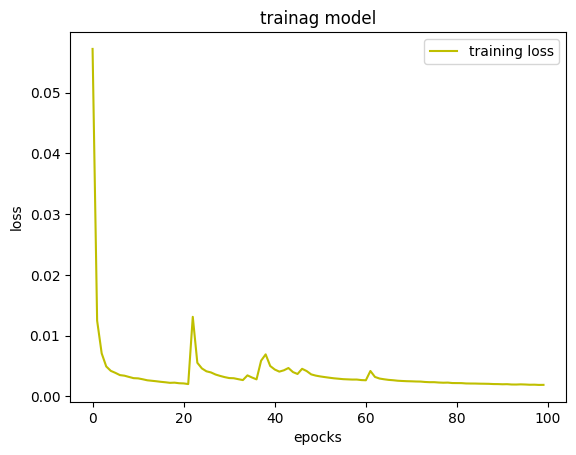

In [ ]:
loss = history.history['mse']
#val_loss=history.history['val_loss']
epochs = range(0 , len(loss))
plt.plot(epochs , loss , 'y' , label='training loss')
#plt.plot(epochs , val_loss , 'r' , label = 'validation_loss')
plt.title('trainag model')
plt.xlabel('epocks')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
data_batch = []
img_num = 0
while img_num < train_gene.n // train_gene.batch_size:
    data = next(train_gene)
    data_batch.append(data[0])
    img_num += 1

In [ ]:
predicted=autoencoder2.predict(data_batch[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


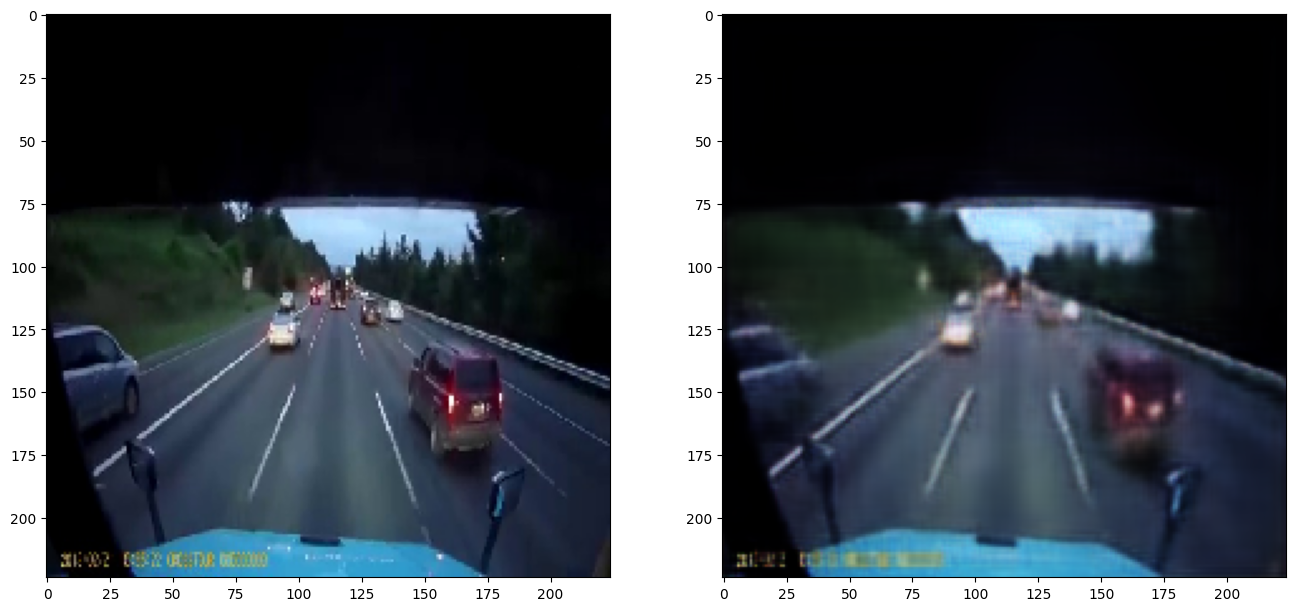

In [ ]:
import random
image_number=random.randint(0 ,predicted.shape[0])
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [ ]:
validation_error=autoencoder2.evaluate_generator(val_gene)
print('validation error : ' , validation_error)

In [ ]:
 autoencoder2.save('autoencoder6.h5')

In [ ]:
from google.colab import files
files.download('autoencoder6.h5')

In [ ]:
for layer in autoencoder2.layers:
    print(layer.name, layer.output.shape)

conv2d_8 (None, 224, 224, 32)
batch_normalization_7 (None, 224, 224, 32)
max_pooling2d_4 (None, 112, 112, 32)
conv2d_9 (None, 112, 112, 64)
batch_normalization_8 (None, 112, 112, 64)
max_pooling2d_5 (None, 56, 56, 64)
conv2d_10 (None, 56, 56, 128)
batch_normalization_9 (None, 56, 56, 128)
max_pooling2d_6 (None, 28, 28, 128)
conv2d_11 (None, 28, 28, 256)
batch_normalization_10 (None, 28, 28, 256)
max_pooling2d_7 (None, 14, 14, 256)
up_sampling2d_4 (None, 28, 28, 256)
conv2d_12 (None, 28, 28, 128)
batch_normalization_11 (None, 28, 28, 128)
up_sampling2d_5 (None, 56, 56, 128)
conv2d_13 (None, 56, 56, 64)
batch_normalization_12 (None, 56, 56, 64)
up_sampling2d_6 (None, 112, 112, 64)
conv2d_14 (None, 112, 112, 32)
batch_normalization_13 (None, 112, 112, 32)
up_sampling2d_7 (None, 224, 224, 32)
conv2d_15 (None, 224, 224, 3)


In [ ]:
bottleneck = autoencoder2.get_layer('max_pooling2d_7').output
lat_rep = Model(inputs=autoencoder2.input, outputs=bottleneck)

In [ ]:
encoded_image=lat_rep.predict_generator(train_gene)

In [ ]:
encoded_val=lat_rep.predict_generator(val_gene)

In [ ]:
target_image=encoded_image[1:]

In [ ]:
def Sliding_window(data , windows_size , stride):
  sele_data=[]
  n_samples=len(data)
  for i in range(0 , n_samples-windows_size+1 , stride):
    end=i+windows_size
    selected_data=data[i:end]
    sele_data.append(selected_data)
  return  sele_data

In [ ]:
x_train=Sliding_window(encoded_image, 20 , 2)

In [ ]:
y_train =Sliding_window(target_image , 20 , 2)

In [ ]:
x_val=Sliding_window(encoded_val , 20 , 2)

In [ ]:
scaler=MinMaxScaler(feature_range=(-1 , 1))
def scale_lat_rep(data):
  scaled_data=[]
  for sample in data :
    scaled_sample=np.zeros_like(sample)
    for channel_index in range (sample.shape[-1]):
      channel_data=sample[... , channel_index]
      flattened_data=channel_data.reshape(-1,1)
      scaled_channel_data=scaler.fit_transform(flattened_data)
      scaled_channel_data=scaled_channel_data.reshape(channel_data.shape)
      scaled_sample[..., channel_index]=scaled_channel_data
    scaled_data.append(scaled_sample)
  return np.array(scaled_data)

In [ ]:
a=scale_lat_rep(x_train)
b=scale_lat_rep(y_train)
c=scale_lat_rep(x_val)

In [ ]:
def LSTM2(input_shape):

  model=Sequential()
  model.add(InputLayer(input_shape=input_shape))

  model.add(ConvLSTM2D(64 , kernel_size=(3,3),activation = 'tanh' , padding='same' , return_sequences=True))
  model.add(TimeDistributed(LeakyReLU()))
  model.add(TimeDistributed(BatchNormalization()))

  model.add(ConvLSTM2D(32 , kernel_size=(3,3),activation='tanh' , padding='same' , return_sequences=True))
  model.add(TimeDistributed(LeakyReLU()))
  model.add(TimeDistributed(BatchNormalization()))

  model.add(ConvLSTM2D(16 , kernel_size=(3,3),activation = 'tanh' , padding='same' , return_sequences=True))

  #model.add(Flatten())


  #model.add(RBF_LAYER(units=64))

  #model.add(InverseFlatten(target_shape=(10,14, 14,16)))

  #model.add(Reshape(target_shape=(10,14,14,16)))


  model.add(TimeDistributed(UpSampling2D((1,1))))
  model.add(ConvLSTM2D(32 , kernel_size=(3,3) ,activation = 'tanh' , padding='same' , return_sequences=True))

  model.add(TimeDistributed(UpSampling2D((1,1))))
  model.add(ConvLSTM2D(64 , kernel_size=(3,3),activation = 'tanh' , padding='same' , return_sequences=True))

  model.add(TimeDistributed(UpSampling2D((1,1))))
  model.add(Conv2D(128, kernel_size=(3, 3), activation="sigmoid", padding="same"))

  return model


In [ ]:
input_shape=(20,28,28,128)
lstm=LSTM2(input_shape)

In [ ]:
input_seq=tf.constant(a)

In [ ]:
val_seq=tf.constant(c)

In [ ]:
lstm.compile(optimizer=optimizer , loss=loss_fn , metrics=['mse'])

In [ ]:
history_1=lstm.fit(a,  a, batch_size=20,  epochs = 60 , shuffle = False)

In [ ]:
lstm.save('LSTM6.h5')

In [ ]:
from google.colab import files
files.download('LSTM6.h5')

In [ ]:
lstm=load_model('/content/LSTM6.h5' , custom_objects={'custom_loss' : custom_loss})

In [ ]:
recon_val=lstm.predict(a)

In [ ]:
val_lstm = lstm.predict(c)

In [ ]:
mse=np.mean(np.square(c - val_lstm))

In [ ]:
print('error is : ' , mse)

In [ ]:
mse_val=[]
for i in range(len(a)):
  mse=np.mean(np.square(a[i]-recon_val[i]))
  mse_val.append(mse)

In [ ]:
anomalie=[]
mse_ther=0.20243998
for i , mse in enumerate(mse_val):
  if mse > mse_ther:
    anomalie.append(i)

In [ ]:
for layer in lstm.layers :
  print(layer.name , layer.output_shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np

class RBFLayer(Layer):
    def __init__(self, units, gamma_initializer='ones', **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma_initializer = gamma_initializer

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='uniform',
                                       trainable=True)
        self.gamma = self.add_weight(name='gamma',
                                     shape=(self.units,),
                                     initializer=self.gamma_initializer,
                                     trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = tf.expand_dims(inputs, axis=1) - self.centers
        sqr_norm = tf.reduce_sum(tf.square(diff), axis=-1)
        output = tf.exp(-self.gamma * sqr_norm)
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


In [ ]:
lstm_bottleneck=lstm.get_layer('conv_lstm2d_2').output
lat_rep_lstm=Model(inputs=lstm.input , outputs=lstm_bottleneck)

In [ ]:
encoded_lstm=lat_rep_lstm.predict(a)

In [ ]:
val_lstm=lat_rep_lstm.predict(c)

In [ ]:
encoded_lstm_val=lat_rep_lstm.predict(c)

In [ ]:
encoded_lstm_shape=encoded_lstm.shape
label_data=np.zeros(encoded_lstm_shape[0])

In [ ]:
input_shape=(20,28,28,16)
lat_dim=32

In [ ]:
inputs=Input(shape=input_shape)
x=Conv2D(8 , (2,2) , activation='relu')(inputs)
x=Conv2D(4, (2,2) , activation='relu')(x)
x=Flatten()(x)

num_centres=100
rbf_layer=RBFLayer(units=num_centres)(x)
output=Dense(1 , activation='sigmoid')(rbf_layer)

model1=Model(inputs=inputs , outputs=output)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist2=model1.fit(encoded_lstm ,label_data , epochs=60 , shuffle=False)

In [ ]:
rbf=model1.predict(encoded_lstm)

In [ ]:
model1.save('RBFlayer.h5')

In [ ]:
def extract_rbf_activations(model, input_data):
    rbf_layer_model = Model(inputs=model.input, outputs=model.get_layer('rbf_layer').output)
    rbf_activations = rbf_layer_model.predict(input_data)
    return rbf_activations

In [ ]:
mean=np.mean(rbf, axis=0)
covariance = np.cov(rbf , rowvar=False)

In [ ]:
def Distance (x , mean , covariance ):
  diff=x-mean
  inv_covariance =np.linalg.inv(covariance)
  distances = np.sqrt(np.dot(np.dot(diff , inv_covariance) , diff.T))
  return distances

In [ ]:
def Classification (data , mean , covariance , ther ):
  distance=[Distance( x , mean , covariance) for x in data ]
  anomalies=[1 if d> ther else 0 for d in distance]
  return anomalies


In [ ]:
ther=0.45
anomalies=Classification (rbf , mean , covariance , ther)

In [ ]:
##############################################################################################################